https://github.com/fchollet/keras/blob/master/examples/imdb_bidirectional_lstm.py

In [1]:
from utilities import plot_keras_model

Using TensorFlow backend.


In [2]:
'''Trains a Bidirectional LSTM on the IMDB sentiment classification task.
Output after 4 epochs on CPU: ~0.8146
Time per epoch on CPU (Core i7): ~150s.
'''

from __future__ import print_function
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

In [3]:
max_features = 20000
# cut texts after this number of words
# (among top max_features most common words)
maxlen = 100
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [5]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

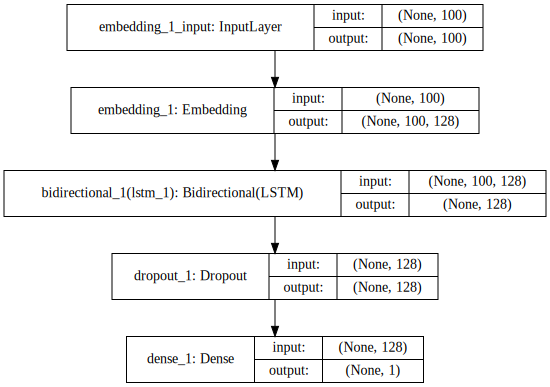

In [6]:
plot_keras_model(model)

In [7]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=4,
validation_data=[x_test, y_test])

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 155s 6ms/step - loss: 0.4276 - acc: 0.8027 - val_loss: 0.3466 - val_acc: 0.8475
Epoch 2/4
25000/25000 [==============================] - 154s 6ms/step - loss: 0.2271 - acc: 0.9140 - val_loss: 0.4330 - val_acc: 0.8409
Epoch 3/4
25000/25000 [==============================] - 153s 6ms/step - loss: 0.1312 - acc: 0.9516 - val_loss: 0.4710 - val_acc: 0.8394
Epoch 4/4
25000/25000 [==============================] - 154s 6ms/step - loss: 0.0646 - acc: 0.9776 - val_loss: 0.6038 - val_acc: 0.8279
